# 3. Inception model

This notebook provides an example of building a neural net with one Inception module. The convnet is a digit classifier.

---

We first load the MNIST data

In [1]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

/home/wazir/.virtualenvs/cv/local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


We preprocess the image as previously

In [2]:
from utils import preprocess

train_images = preprocess(train_images)
test_images = preprocess(test_images)

We also need to one-hot encode the labels

In [3]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

We can construct our neural net with inception module. Keep in mind that when we concatenate different branches, different inputs should have matching shapes except for the concat axis

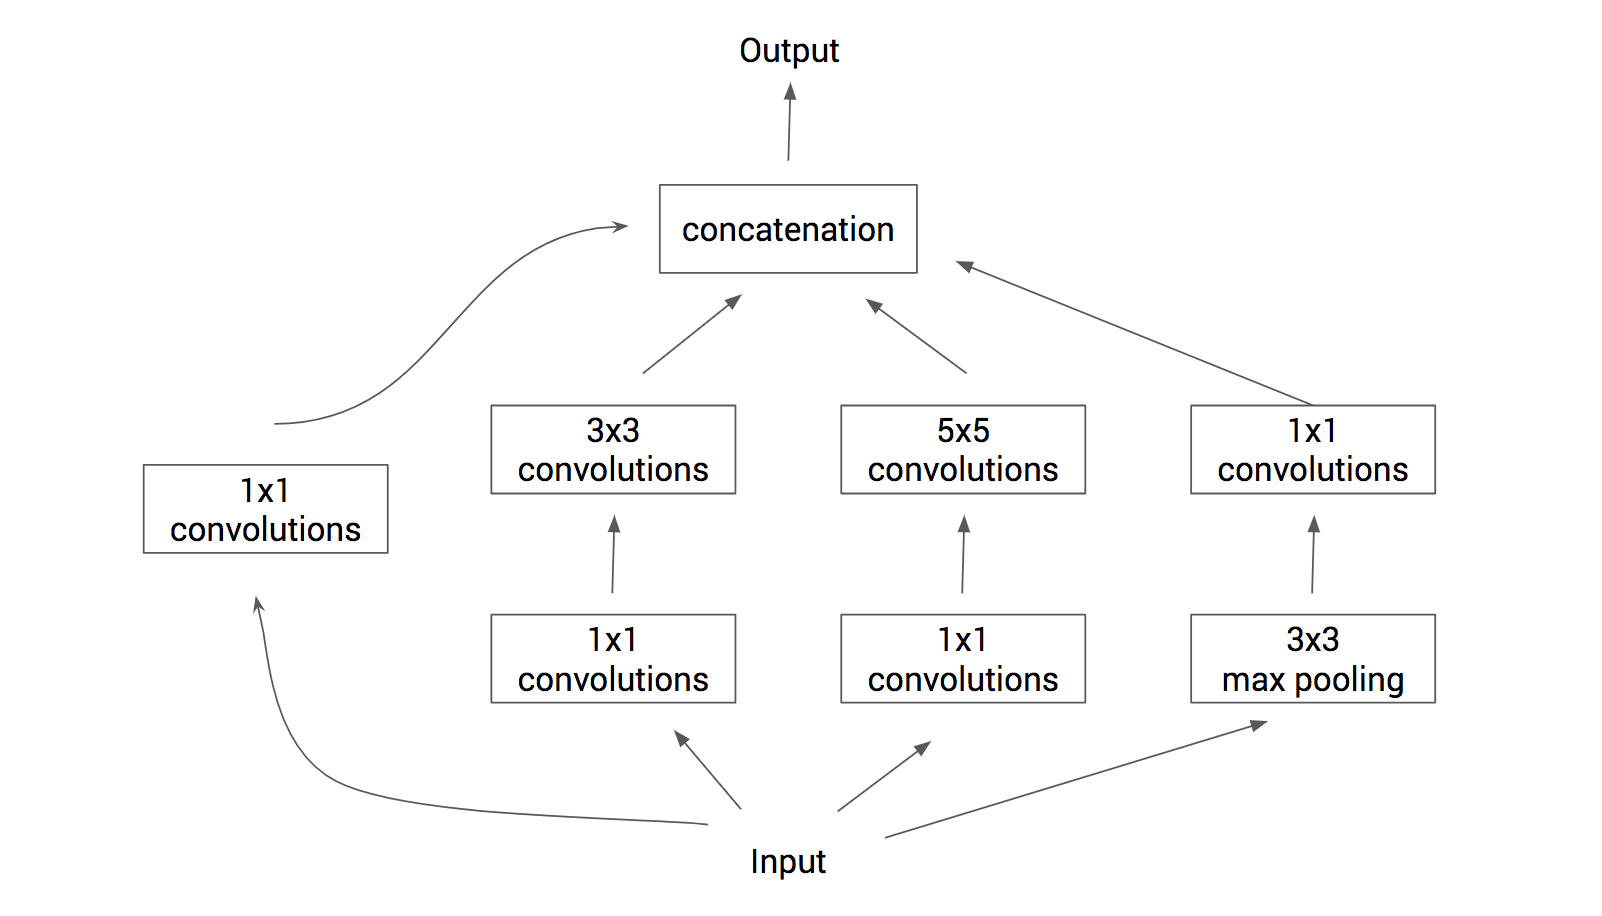

In [4]:
from IPython.display import Image
Image('3inception.png')



In [5]:
from keras import layers
from keras import Input
from keras.models import Model


inputs = Input(shape=(28, 28, 1))

# branch a
a = layers.Conv2D(64, (1, 1), activation='relu')(inputs)
a = layers.MaxPool2D(2, 2)(a)

# branch b
b = layers.Conv2D(32, (1, 1), activation='relu')(inputs)
b = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(b)
b = layers.MaxPool2D(2, 2)(b)

# branch c
c = layers.Conv2D(32, (1, 1), activation='relu')(inputs)
c = layers.Conv2D(64, (5, 5), activation='relu', padding='same')(c)
c = layers.MaxPool2D(2, 2)(c)

# branch d
d = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
d = layers.Conv2D(64, (1, 1), activation='relu')(d)
d = layers.MaxPool2D(2,2)(inputs)

# concatenation
concat = layers.concatenate([a, b, c, d], axis=-1)

# add dense layers
output = layers.Flatten()(concat)
output = layers.Dense(32, activation='relu')(output)
output = layers.Dense(10, activation='softmax')(output)

Instantiate the model and compile the model

In [6]:
model = Model(inputs, output)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 28, 28, 32)   64          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 28, 28, 32)   64          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 64)   128         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (

Train model

In [8]:
model.fit(train_images, train_labels, epochs=1, batch_size=64)

Epoch 1/1
 2432/60000 [>.............................] - ETA: 9:31 - loss: 0.8958 - acc: 0.7163

KeyboardInterrupt: 

Since we have multiple branches the computation is getting more intensive: 1 epoch is taking 10-15 mins on a modern laptop. This kind of heavy lifting calls for GPU.

But as long as the network is training then rest assured the Inception module is constructed properly!

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

In [ ]:
test_acc